In [ ]:
#Ham Verinin Zipf Yasası ile görünümü

In [2]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'food-dataset-en.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()



,name,text,ingredient,energy,type_kitchen,time_cook,link,label
0,Breakfast for the lazy,"Put cottage cheese in a wide bowl, add an egg,...","Chicken egg: 1 piece, soft cottage cheese: 200...","Calorius 87 kcal, proteins 8 grams, fats 2 gra...",Russian kitchen,15 minutes,https://eda.ru/recepty/zavtraki/zavtrak-dlja-l...,Breakfast
1,Breek breakfast,"Rinse buckwheat, pour 2 cups of boiling water,...","Buckwheat cereal: 1 cup, chopped parsley: to t...","Calorius 284 kcal, proteins 6 grams, fats 11 g...",Russian kitchen,1 hour 20 minutes,https://eda.ru/recepty/zavtraki/grechnevij-zav...,Breakfast
2,Childhood breakfast,Grate the carrots and green apple on the middl...,"Carrots: 1 piece, apple: 1 piece, oranges: 1 p...","Caloria 623 kcal, proteins 13 grams, fats 22 g...",Russian kitchen,5 minutes,https://eda.ru/recepty/zavtraki/zavtrak-detstv...,Breakfast
3,Full English breakfast,"Heat the oven to 180 degrees, and the frying p...","Chicken egg: 2 pieces, pork sausages: 2 pieces...","Caloria 907 kcal, proteins 26 grams, fats 75 g...",British cuisine,30 minutes,https://eda.ru/recepty/zavtraki/polnyy-angliys...,Breakfast
4,French croutons for breakfast,Mix the egg with milk.Salt.Dip the pieces of t...,"Baton: 3 pieces, milk: 2 tablespoons, chicken ...","Caloria 519 kcal, proteins 16 grams, fats 29 g...",French cuisine,10 minutes,https://eda.ru/recepty/zavtraki/francuzskie-gr...,Breakfast


In [4]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.0 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.0 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 931.6 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 949.2 kB/s eta 0:00:07
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ------------- -------------------------- 2.6/8.1 MB 1.2 MB/s eta 0:00:05
   -------------- ----------------

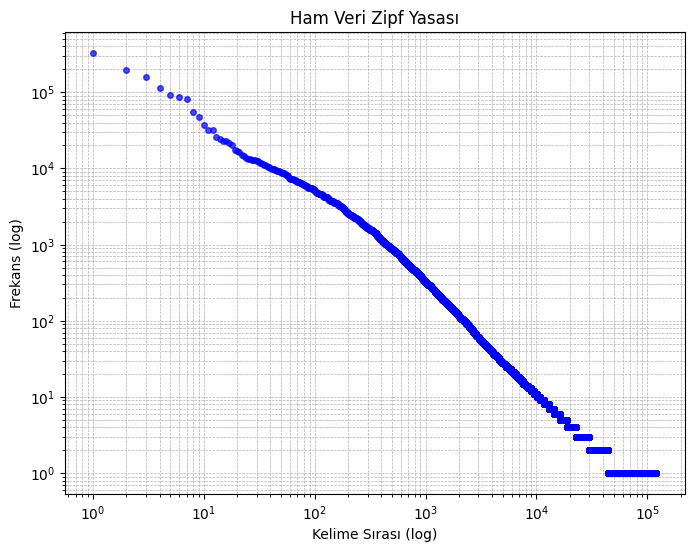

In [20]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
#from collections import Counter #  counter kutuphanesi kullanmak icin

# Kelime frekanslarını hesapla
#word_freq = Counter(hamlet)  #  counter kutuphanesi kullanarak

# Veriyi oku
df = pd.read_csv("food-dataset-en.csv")

# Gerçek sütun adıyla metinleri al
texts = df["text"].astype(str)

# Kelimeleri parçala
kelimeler = []
for cumle in texts:
    for kelime in cumle.lower().split():
        kelimeler.append(kelime)

# Frekansları hesapla
word_freq = {}
for word in kelimeler:
    word_freq[word] = word_freq.get(word, 0) + 1

# Frekansları azalan şekilde sırala
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Rank (sıralama) oluştur
ranks = np.arange(1, len(sorted_freqs) + 1)

# Log-log grafiği çiz
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7, color="b")

# Grafik etiketleri
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.title("Ham Veri Zipf Yasası")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
